In [111]:
from numpy.fft import fft, ifft, fftfreq
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from scipy import signal

from ipywidgets import interact
import ipywidgets as widgets


In [115]:
amp = 2 #amplitude of square wave
T = 1*10**(-3) #period of square wave
fs = 200*10**3 #200kHz sampling freq
t = np.arange(0,1,1/fs)

In [123]:
fig = make_subplots(rows =1, cols = 3)
fig.add_scatter(x = t, row = 1, col = 1)
fig.update_xaxes(range=[0,0.01],row = 1, col = 1)
fig.update_yaxes(range=[-3,3], row = 1, col = 1)
fig.add_scatter(row = 1, col = 2)
fig.add_scatter(row = 1, col = 3)
fig.update_xaxes(range = [0,8000],row = 1, col = 3)
figw = go.FigureWidget(fig)

In [125]:
@interact(duty = (0.1, 0.9, 0.1), scale = ["amps", "dBscale"]) #duty cycle
def update(duty = 0.5, scale = "amps"): 
    y = 2*signal.square(2*np.pi*t*(1/T),duty)

    u = fft(y)
    U = 2*abs(fft(y))/fs
    xu = fftfreq(fs,1/fs )
    u_db = 20*np.log10(U[0:fs//2]/np.sqrt(2))

    #plt.plot(xu[:fs//2], 2/fs*np.abs(u[0:fs//2]))
    #plt.plot(xu,abs(u))
    # plt.plot(xu[:fs//2], u_db)
    # plt.xlim(0,8000)

    with figw.batch_update():
        figw.data[0].y = y
        figw.data[1].x = xu[:fs//2]
        figw.data[2].x = xu[:fs//2]
        if scale =="amps":
            figw.data[1].y = 2/fs*abs(u[0:fs//2])
            figw.data[2].y = 2/fs*abs(u[0:fs//2])
        else :
            figw.data[1].y = u_db
            figw.data[2].y = u_db
figw

interactive(children=(FloatSlider(value=0.5, description='duty', max=0.9, min=0.1), Dropdown(description='scal…

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': 'c880fab7-236d-400b-977a-cbdc060d066f',
 …

(0.0, 8000.0)

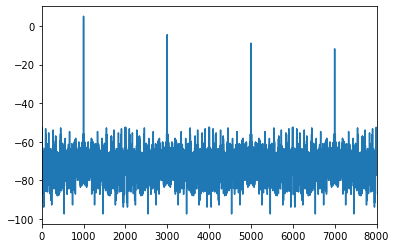

In [83]:
y.size

200000